# Exploring Artificial Intelligence

*See accompanying blogpost [here](https://jontysinai.github.io/jekyll/update/2017/11/11/the-perceptron.html)*

A foray into artificial intelligence, with the help of math, history and Python.  
by _Jonty Sinai_


## Section 1: Foundations of Machine Learning
## Part 2: The Perceptron

We will explore an evolution of the MCP Neuron, discussed in Part 1, artificial neuron known as the Perceptron, which was introduced by the psychologist Frank Rosenblatt in 1957. The Perceptron extended the MCP Neuron model by incorporating a simple learning algorithm, which could learn a set of weights, instead of having to pre-programme the weights.

### Reminder: The MCP Neuron

As a reminder, recall the mathematical model of the MCP Neuron:

![](../Assets/mcp-neuron-graph.png)

* $m$ binary input signals, $\ x_1, x_2, ..., x_m \in \{0,1\}$.
* A set of binary _weights_ for each input, $\ w_1, w_2, ..., w_m \in \{-1,0,1\}$.
* An _activation function_, $\ f:\{0,1\}^{m} \to \{0,1\}$.
* A threshold value; an integer $\ t \in \mathbb{Z}^{*}$.
* An output signal, $\ y \in \{0,1\}$, such that $\ y = f(x_1, x_2, ..., x_m)$

For the MCP Neuron, the activation function was the *Heaviside step function*:

$$
y = \left\{
\begin{array}{l}
1, \ \text{if} \ \sum_{i=1}^{m}w_{i}x_{i} \geq t,\\[3pt]
0, \ \text{otherwise}
\end{array}
\right.
$$

### The Perceptron Model

The Perceptron extends the MCP Neuron model above, first by allowing the input signals and weights to take values in $\ \mathbb{R}^m$. The output signals are still, for the moment, binary, but taking value $\ y \in \{-1,1\}$, instead of from $\ \{0,1\}$. This is a minor detail which we make for computational convenience. 

The significant change, however, is the incorporation of a *learning algorithm* to learn the weights. In particular, the Perceptron is a supervised learning problem where we have *training data* with the correct input and output values. If there are $N$ *training examples*, then our training data takes the form:

$$
\ (\mathbf{x}_n, y_n) \in \mathbb{R}^{m}\times\{-1,1\}, \ \ \forall \ n = 1,2, ..., N
$$. 

For a given training example, $\ \mathbf{x}_n$, a *prediction* is made using the Heaviside step function, as before.

Then the learning algorithm is follows:

1. Initialise the weights vector, $\ \mathbf{w}$ either to zero or with random, small values.
2. For $\ n = 1,2, ..., N$:
    1. Calculate the predicted label for $\ \mathbf{x}_n$ using $\ \mathbf{w}$:
    
    $$
    \hat{y_n} = \left\{
    \begin{array}{l}
        1, \ \text{if} \ \mathbf{w}^T\mathbf{x}_n \geq t,\\[3pt]
        -1, \ \text{otherwise}
    \end{array}
    \right.
    $$
    
    2. Update the weights vector using the *update rule*:
    
    $$
    \mathbf{w} := \mathbf{w} + \Delta\mathbf{w}
    $$
    
    where 
    
    $$
    \Delta\mathbf{w} = \alpha(y_n - \hat{y_n})\mathbf{x}_n
    $$
    
    The parameter $\alpha > 0$ is called the *learning rate* and controls the sensitivity of the updates to incorrect predictions. For more on the intuition behind the learning rate, see the accompanying blogpost.
    
[Image of the Perceptron model here]

As a technical note, the decision boundary of the hyperplane $\ \mathbf{w}^T\mathbf{x}$ is restricted to passing through the origin. So to avoid this, and thus increase the range of motion of the decision boundary, we add an extra *intercept* term, $\ x_0 = 1$ to each training example, and corresponding $\ w_0$ in the weights vector.


To get a feeling for the intuition behind the update rule, consider separately the cases when a correct prediction is made, when a positive label is misclassified and when a negative label is misclassified:

* **Correct prediction:** In this case, $\ y_n = \hat{y_n}$, so 

    $$
    \Delta\mathbf{w} = \alpha(0)\mathbf{x}_n = 0
    $$
    
    Thus the weights remain unchanged.
    
    
* **Incorrect negative prediction:**

    $$
    \Delta\mathbf{w} = \alpha(1 - (-1))\mathbf{x}_n = \alpha(2)\mathbf{x}_n
    $$
    
    In this case, the weights are increased by a positive factor of $\ 2$, thereby pushing the prediction $\ \mathbf{w}^T\mathbf{x}_n$ in a positive direction.
    
    
* **Incorrect positive prediction:**

    $$
    \Delta\mathbf{w} = \alpha(-1 - (1))\mathbf{x}_n = \alpha(-2)\mathbf{x}_n
    $$
    
    In this case, the weights are increased by a negative factor of $\ -2$, thereby pushing the prediction $\ \mathbf{w}^T\mathbf{x}_n$ in a positive direction.

## The Perceptron in Python

We will now implement the Perceptron in Python as a class object. The Perceptron is instantiated with two parameters: the learning rate, $\ \alpha$, and the total number of *epochs* - where an epoch is a complete pass through the entire training set.

The class keeps track of two attributes: the weights vector, which can be used to make new predictions by using the `predict` method, and a list of the number of errors in each epoch. It is important to keep track of the number of errors, in order to make sure that the error rate is decreasing as the Perceptron learns. If not, an increasing or unstable error rate is an indication that either the error rate needs to be adjusted, or more epochs are needed, or that the Perceptron simply cannot learn a good decision boundary for the given data.

Note that before the learning procedure, a vector of $\ 1$'s is added the traing examples to account for the intercept term used in the weights vector. This allows the Perceptron to learn decision boundaries which are not restricted to passing through the origin.

In [108]:
import numpy as np

class Perceptron(object):
    """Perceptron binary classifier.
    
    Learns a decision boundery to classify data as either positive or negative.
    
    
    Parameters
    ----------
    alpha : float
            Learning rate.
    threshold : float
                Threshold used for predicting a label.
    epochs : integer
             Number of passes over the training data.
                
    Attributes
    ----------
    w_ : array-like, shape = [1, m]
         Learned weights
    errors : list of integers
             number of misclassifications made in each epoch.
             
    """
    def __init__(self, alpha = 0.01, threshold = 0, intercept = True, epochs = 10):
        self.alpha = alpha
        self.threshold = threshold
        self.intercept = intercept
        self.epochs = epochs
        
        
    def learn(self, X, y):
        """
        Implements the Perceptron learning algorithm to learn the weights for
        the Perceptron classifier.
        
        Parameters
        ----------
        X : array-like, shape = [N, m]
            Training example inputs.
        y : array-like, shape = [N, 1]
            Training example labels.
        
        Returns
        -------
        self: object
        
        """
        
        N = X.shape[0]
        
        if self.intercept:
            X = np.concatenate((np.ones([N,1]), X), axis = 1)
            
        m = X.shape[1]
        
        self.w_ = self.initialise(m)
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            
            for x_n, y_n in zip(X,y):
                x_n = x_n.reshape((m, 1))
                update = self.alpha*(y_n - self.predict(x_n))*x_n
                self.w_ += update
                errors += np.sum(update != 0.0)/(m)
                
            self.errors_.append(errors)
            
        return self
    
    
    def initialise(self, m):
        """Initialise vector of weights to zero"""
        return np.zeros([m, 1])
    
    
    def predict(self, x):
            """Heaviside activation function."""
            return np.where(np.dot(self.w_.T, x) >= self.threshold, 1, -1)

    

### Applying the Perceptron to Logic Gates

Recall that using the MCP Neuron, we could model the AND, OR and NOT logic gates by specifying an appropriate weights vector and threshold. For example, to model the AND gate for two input signals, we could specifiy a weights vector $\ \mathbf{w} = [1,1]$ and a threshold value $\ t = 2$ so that both input signals had to be positive to trigger a positive signal.

Below, we will show how the Perceptron can represent the OR and AND logic gates as a decision boundary in a 2D plane.

**OR Gate**:

| $x_1$      | $x_2$      | $y$       |
|:----------:|:----------:|:---------:|
| 0          | 0          | 0         |
| 0          | 1          | 1         |
| 1          | 0          | 1         |
| 1          | 1          | 1         |

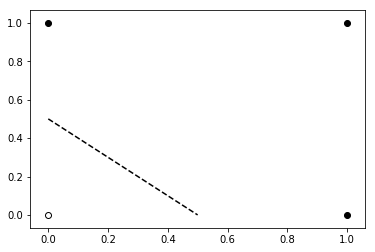

In [109]:
import matplotlib.pyplot as plt

OR = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,1]])

OR_pcptrn = Perceptron(alpha=0.1, threshold=0.5, intercept = False, epochs=10)
OR_pcptrn.learn(X = OR[:,0:2], y = OR[:,2:])

# OR Gate Decision Boundery
plt.scatter(OR[1:,0], OR[1:,1], color='black', marker = 'o')
plt.scatter(OR[0,0], OR[0,1], color='white', edgecolor = 'black', marker='o')

xx = np.linspace(0.0, 0.5)
w = OR_pcptrn.w_
a = 0.5
b = -w[0]/w[1]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

**AND Gate**:

| $x_1$      | $x_2$      | $y$       |
|:----------:|:----------:|:---------:|
| 0          | 0          | 0         |
| 0          | 1          | 0         |
| 1          | 0          | 0         |
| 1          | 1          | 1         |

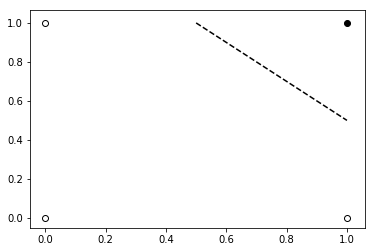

In [110]:
import matplotlib.pyplot as plt

AND = np.array([[0,0,0], [0,1,0], [1,0,0], [1,1,1]])

AND_pcptrn = Perceptron(alpha=0.1, threshold=1.5, intercept = False, epochs=10)
AND_pcptrn.learn(X = AND[:,0:2], y = AND[:,2:])

# OR Gate Decision Boundery
plt.scatter(AND[3,0], AND[3,1], color='black', marker = 'o')
plt.scatter(AND[:3,0], AND[:3,1], color='white', edgecolor = 'black', marker='o')

xx = np.linspace(0.5, 1)
w = AND_pcptrn.w_
a = 1.5
b = -w[0]/w[1]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

### Perceptron on a Test Data

Finally, to show how the Perceptron can solve a greater class of problems than the MCP Neuron, we will implement the Perceptron on the Iris dataset, which is a popular benchmark for simple, linear classifiers.

The Iris dataset can be obtained from the archives of the Donald Bren School of Information and Computer Science at the University of California, Irvine. Find the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/).

The Iris plants database contains 150 observations of three different types of iris: setosa, versicolour and virginica. For each observation, the sepal width, sepal length, petal width and petal length are measured. 

For visualisation convenience, consider only two of these classes - setosa and versicolor - and two of these measurements - sepal length and petal length.

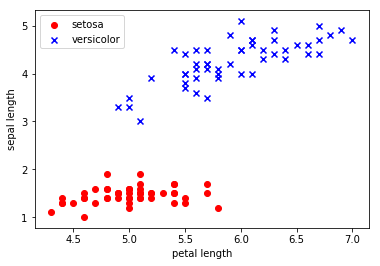

In [111]:
import pandas as pd

# load data
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = iris.iloc[0:100, [0,2]].values

# data visualisation
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')

plt.show()

From the scatter plot, we can see that this data form two distinct clusters. Our aim will be to use the Perceptron to draw a decision boundary between these two clusters.

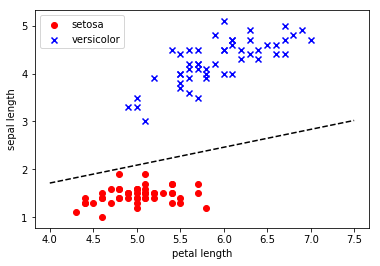

In [112]:
# initialise parameters for the Perceptron
iris_pcptrn = Perceptron(alpha = 0.1, epochs = 10)
# learn weights
iris_pcptrn.learn(X,y)

# plot decision boundary
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')

xx = np.linspace(4, 7.5)
w = iris_pcptrn.w_
a = -w[0]/w[2]
b = -w[1]/w[2]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

Finally, we can plot the number of errors over the number of epochs to show that the Perceptron quickly converges to a good decision boundary: one that is able to easily distinguish between Iris Setosa and Iris Versicolor with zero error!

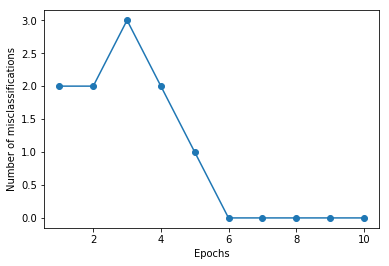

In [113]:
plt.plot(range(1, len(iris_pcptrn.errors_) + 1), iris_pcptrn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()